In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# File paths
data_path = Path("../DATA/amazon-purchases.csv")
output_img = Path("../OUTPUT/monthly_purchases.png")

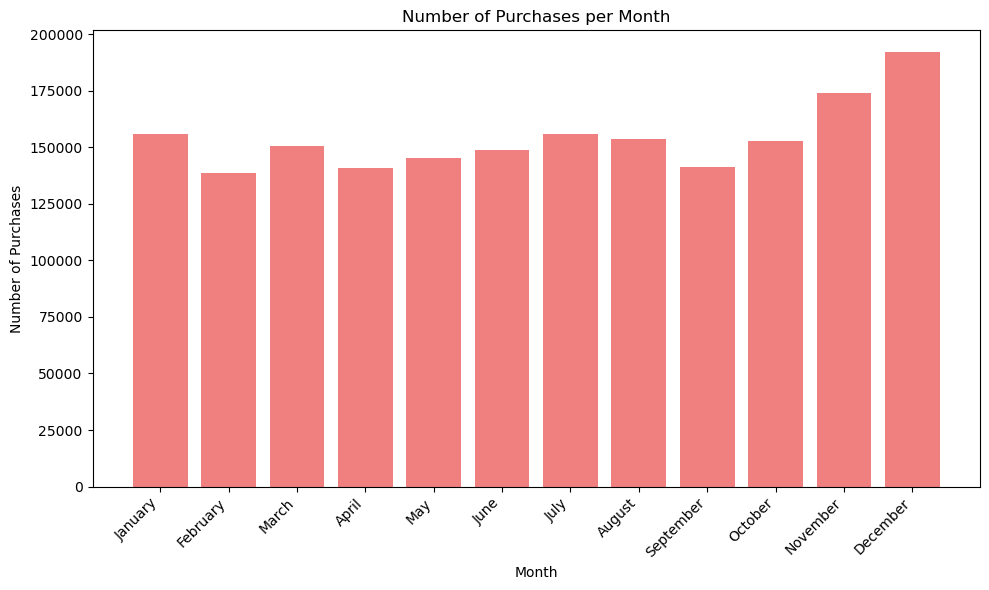

In [9]:
df = pd.read_csv(data_path)

df["Order Date"] = pd.to_datetime(df["Order Date"], format="%Y-%m-%d", errors="coerce")

df = df.dropna(subset=["Order Date"])

# Extract month name
df["Month"] = df["Order Date"].dt.month
df["Month Name"] = df["Order Date"].dt.month_name()

# Count purchases per month
month_counts = (
    df.groupby(["Month", "Month Name"])
    .size()
    .reset_index(name="Count")
    .sort_values("Month")
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(month_counts["Month Name"], month_counts["Count"], color="lightcoral")
plt.title("Number of Purchases per Month")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save
output_img.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(output_img, dpi=300, bbox_inches="tight")
plt.show()